## Вычислим номер моего варианта:

In [67]:
# Данные
student_id = 1132226429 # Номер студенческого билета
num_variants = 70 # Количество вариантов

# Вычисление номера варианта
variant = (student_id % num_variants) + 1
print(variant)

20

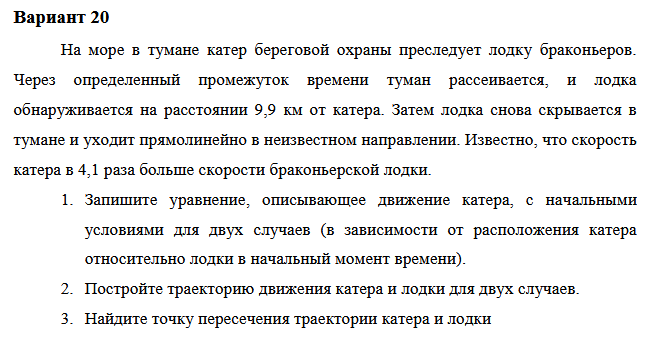

## Запишем уравнение, описывающее движение катера, с начальными условиями для двух случаев (в зависимости от расположения катера относительно лодки в начальный момент времени).

В данном задаче мы моделируем движение катера береговой охраны, который должен догнать и затем следовать за лодкой браконьеров, используя полярные координаты.

### 1. Начальные условия

- $ t_0 = 0 $: Время, когда происходит обнаружение лодки.
- $ x_{l0} = 0 $: Местоположение лодки браконьеров в момент обнаружения — на полюсе, т.е. в начале координат.
- $ x_{k0} = 9,9 $ км: Местоположение катера береговой охраны в момент обнаружения лодки.

### 2. Установка полярной системы координат

- Полюс выбран как точка обнаружения лодки, и ось $ r $ (радиальная ось) проходит через точку нахождения катера береговой охраны.
- Угол $ \theta = 0 $ в момент обнаружения лодки, и катер будет двигаться вдоль этой оси до тех пор, пока не окажется на том же расстоянии от полюса, что и лодка.

### 3. Первоначальная прямая траектория катера

Катер должен двигаться вдоль прямой, пока не окажется на одинаковом расстоянии от полюса, как и лодка. Лодка за время $ t $ пройдет расстояние $ x $, а катер — расстояние $ k - x $ (или $ k + x $, в зависимости от того, с какой стороны катер относительно полюса).

Время, за которое оба пройдут это расстояние, будет одинаковым. Для лодки это время равно $ \frac{x}{v} $, где $ v $ — скорость лодки. Для катера время будет $ \frac{k - x}{4.1v} $ (или $ \frac{k + x}{4.1v} $, в зависимости от положения катера).

Поскольку время одинаковое, мы составляем уравнение:

$$
\frac{x}{v} = \frac{k - x}{4.1v}
$$

или

$$
\frac{x}{v} = \frac{k + x}{4.1v}
$$

Таким образом, для первого случая, где $ k = 9.9 $:

$$
x_1 = \frac{9.9}{5.1}
$$

Для второго случая:

$$
x_2 = \frac{9.9}{3.1}
$$

### 4. Переход к круговой траектории

После того как катер окажется на том же расстоянии от полюса, что и лодка, он должен начать движение по круговой траектории вокруг полюса. При этом катер должен удаляться от полюса с той же скоростью $ v $, что и лодка. 

Для этого мы разбиваем скорость катера на две составляющие:
- **Радиальная скорость** ($ v_r $) — это скорость, с которой катер удаляется от полюса. Мы полагаем, что радиальная скорость равна скорости лодки: 

$$
v_r = \frac{dr}{dt} = v
$$

- **Тангенциальная скорость** ($ v_{\tau} $) — это скорость, с которой катер движется по окружности вокруг полюса. Эта скорость определяется через угловую скорость $ \frac{d\theta}{dt} $:

$$
v_{\tau} = r \frac{d\theta}{dt}
$$

Так как катер движется с более высокой скоростью (в 4,1 раза больше скорости лодки), мы находим тангенциальную скорость:

$$
v_{\tau} = \sqrt{16.81 \cdot v^2 - v^2} = \sqrt{15.81} \cdot v
$$

### 5. Система дифференциальных уравнений

Теперь мы можем описать движение катера в виде системы дифференциальных уравнений:

$$
\begin{cases}
\frac{dr}{dt} = v \\
r \frac{d\theta}{dt} = \sqrt{15.81} \cdot v
\end{cases}
$$

С начальными условиями для первого случая:

$$
\begin{cases}
\theta_0 = 0 \\
r_0 = \frac{9.9}{5.1}
\end{cases}
$$

Для второго случая:

$$
\begin{cases}
\theta_0 = -\pi \\
r_0 = \frac{9.9}{3.1}
\end{cases}
$$

### 6. Уравнение для радиальной зависимости

Исключая из системы производную по времени $ t $, можно получить уравнение, которое связывает радиус $ r $ и угол $ \theta $:

$$
\frac{dr}{d\theta} = \frac{r}{\sqrt{15.81}}
$$

Это уравнение можно решить, чтобы получить траекторию катера в полярных координатах.

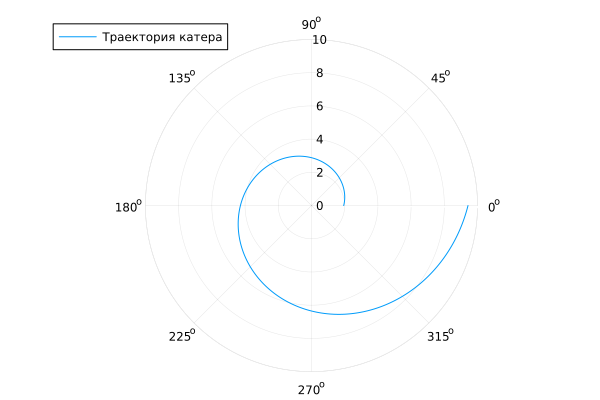

In [54]:
using DifferentialEquations, Plots

# Расстояние между лодкой и катером
k = 9.9 

# Начальные условия для двух случаев
r0 = k / 5.1 
r0_2 = k / 3.1 
theta0 = (0.0, 2*pi) 
theta0_2 = (-pi, pi)

# Угол движения лодки браконьеров и интервал времени
fi = 3*pi/4
t = (0, 50)

# Функция, описывающая движение лодки браконьеров
x(t) = tan(fi) * t

# Дифференциальное уравнение для движения катера
f(r, p, t) = r / sqrt(15.81)

# Решение ДУ для первого случая
prob = ODEProblem(f, r0, theta0)
sol = solve(prob, saveat = 0.01)

# Построение траектории катера
plot(sol.t, sol.u, proj=:polar, lims=(0, 10), label="Траектория катера")

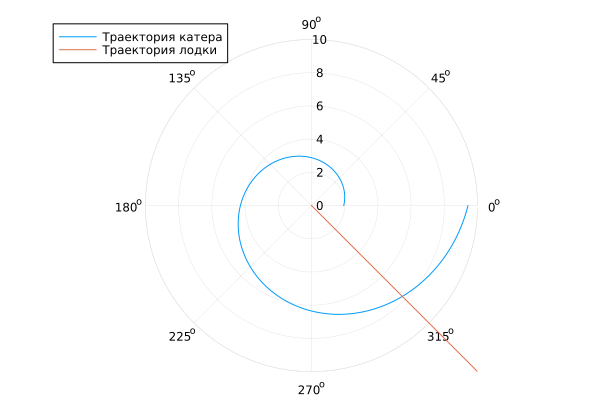

In [55]:
# Угол и координаты для построения траектории лодки
ugol = [fi for i in range(0, 15)]
x_lims = [x(i) for i in range(0, 15)]

# Добавление траектории лодки на график
plot!(ugol, x_lims, proj=:polar, lims=(0, 10), label="Траектория лодки")

In [57]:
# Точное решение уравнения движения катера
y(x) = (33*exp((10*x)/(sqrt(1581))+(10*pi)/(sqrt(1581))))/(17)
# Определение точки пересечения для первого случая
y(fi)

7.736699611465326

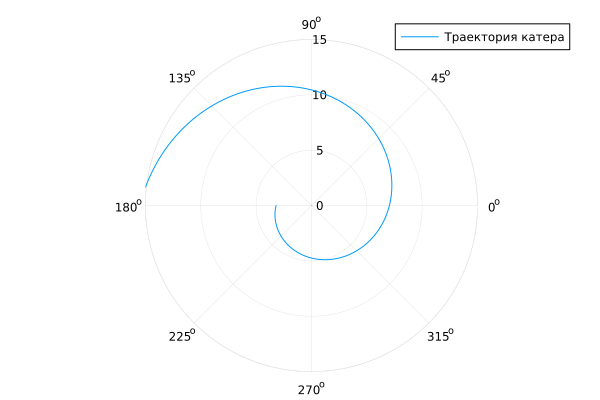

In [64]:
# Решение ДУ для второго случая
prob_2 = ODEProblem(f, r0_2, theta0_2)
sol_2 = solve(prob_2, saveat = 0.01)

# Построение траектории катера во втором случае
plot(sol_2.t, sol_2.u, proj=:polar, lims=(0, 15), label="Траектория катера")

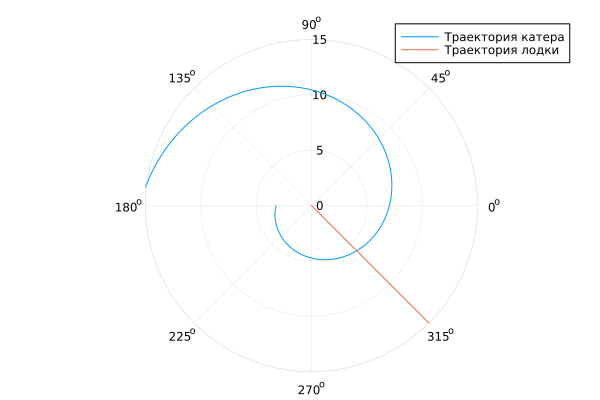

In [65]:
# Добавление траектории лодки на график
plot!(ugol, x_lims, proj=:polar, lims=(0, 15), label="Траектория лодки")

In [66]:
# Точное решение уравнения движения катера для второго случая
y(x)=(99*exp((10*x)/(sqrt(1581))+(10*pi)/(sqrt(1581))))/(31)
# Определение точки пересечения для второго случая
y(fi-pi)

5.775993090103209